In [37]:
from keras.datasets import reuters
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 1s 1us/step


In [51]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results     

In [52]:
x_train = vectorize_sequences(train_data)
y_train = vectorize_sequences(test_data)

In [53]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i,label]= 1
    return results    
    

In [54]:
one_hot_train_labels= to_one_hot(train_labels)
one_hot_test_labels= to_one_hot(test_labels)

In [55]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dense(46, activation ='softmax' ))

model.compile(optimizer ='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
x_val = x_train[:1000 ]
partial_x_train =x_train[1000:]

y_val = one_hot_train_labels[:1000 ]
partial_y_train =one_hot_train_labels[1000:]

In [57]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size =512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 198us/step - loss: 2.7792 - acc: 0.5021 - val_loss: 1.8363 - val_acc: 0.6210
Epoch 2/20
7982/7982 [==============================] - 1s 136us/step - loss: 1.4846 - acc: 0.6919 - val_loss: 1.3462 - val_acc: 0.7010
Epoch 3/20
7982/7982 [==============================] - 1s 136us/step - loss: 1.0791 - acc: 0.7734 - val_loss: 1.1519 - val_acc: 0.7480
Epoch 4/20
7982/7982 [==============================] - 1s 162us/step - loss: 0.8472 - acc: 0.8220 - val_loss: 1.0460 - val_acc: 0.7710
Epoch 5/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.6741 - acc: 0.8589 - val_loss: 0.9677 - val_acc: 0.8060
Epoch 6/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.5387 - acc: 0.8887 - val_loss: 0.9418 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 136us/step - loss: 0.4371 - acc: 0.9090 - val_loss: 0.8889 - val_acc: 0.8210


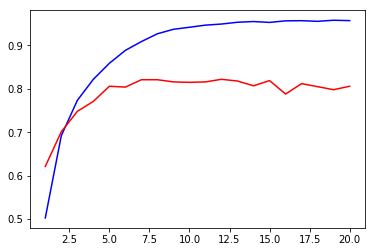

In [59]:
epochs = range(1, len(history.history['loss']) +1) 
plt.plot(epochs, history.history['acc'], 'b')
plt.plot(epochs, history.history['val_acc'], 'r') 
plt.show()

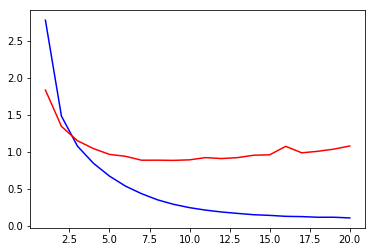

In [60]:
plt.plot(epochs, history.history['loss'], 'b')
plt.plot(epochs, history.history['val_loss'], 'r') 
plt.show()

In [65]:
for i, j in enumerate(history.history['acc']):
    print(i, j)

0 0.502129792644
1 0.691931846998
2 0.773365070978
3 0.821974443541
4 0.858932597435
5 0.888749687169
6 0.90904535261
7 0.927085942566
8 0.93735905679
9 0.942119769661
10 0.94700576325
11 0.94951139995
12 0.953645702921
13 0.955274366729
14 0.95326985697
15 0.956903032001
16 0.957278878445
17 0.95577549446
18 0.958281133026
19 0.957404160135


In [69]:
modela = models.Sequential()
modela.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
modela.add(layers.Dense(64, activation='relu'))
modela.add(layers.Dense(46, activation='softmax'))

modela.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics =['accuracy'])

newhistory=modela.fit(partial_x_train, partial_y_train, batch_size = 512, epochs = 9,validation_data=(x_val, y_val) )


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 164us/step - loss: 2.7292 - acc: 0.5041 - val_loss: 1.8010 - val_acc: 0.6380
Epoch 2/9
7982/7982 [==============================] - 1s 129us/step - loss: 1.4520 - acc: 0.7072 - val_loss: 1.3066 - val_acc: 0.7220
Epoch 3/9
7982/7982 [==============================] - 1s 135us/step - loss: 1.0606 - acc: 0.7746 - val_loss: 1.1540 - val_acc: 0.7440
Epoch 4/9
7982/7982 [==============================] - 1s 130us/step - loss: 0.8375 - acc: 0.8187 - val_loss: 1.0543 - val_acc: 0.7740
Epoch 5/9
7982/7982 [==============================] - 1s 127us/step - loss: 0.6693 - acc: 0.8596 - val_loss: 0.9796 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 128us/step - loss: 0.5361 - acc: 0.8911 - val_loss: 0.9514 - val_acc: 0.7980
Epoch 7/9
7982/7982 [==============================] - 1s 129us/step - loss: 0.4322 - acc: 0.9109 - val_loss: 0.9123 - val_acc: 0.8100
Epoch 8

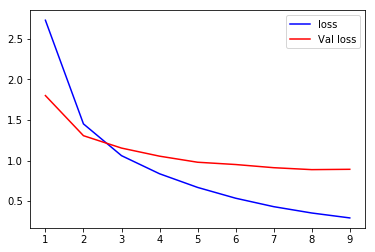

In [71]:
epoches = range(1, len(newhistory.history['loss'])+1)

plt.plot(epoches, newhistory.history['loss'], 'b', label='loss')
plt.plot(epoches, newhistory.history['val_loss'], 'r', label='Val loss') 
plt.legend()
plt.show()

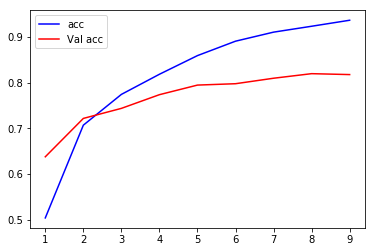

In [72]:
plt.plot(epoches, newhistory.history['acc'], 'b', label='acc')
plt.plot(epoches, newhistory.history['val_acc'], 'r', label='Val acc') 
plt.legend()
plt.show()